In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileList = glob.glob("../Datasets/Dataset_1A/*/*.csv")

In [3]:
df = pd.DataFrame.from_dict(fileList)
df.rename(columns={0:"path"},inplace = True)

In [4]:
df["file"] = df["path"].apply(lambda x: x.split("/")[-1])


In [5]:
df.head()

,path,file
0,../Datasets/Dataset_1A/User2/19_MetaWear_2019-...,19_MetaWear_2019-09-14T16.20.41.254_F1E55E2FE9...
1,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...
2,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...
3,../Datasets/Dataset_1A/User2/14_MetaWear_2019-...,14_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...
4,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...


In [6]:
df["expID"] = df["file"].apply(lambda x: x.split("_")[0])

In [7]:
df.head()

,path,file,expID
0,../Datasets/Dataset_1A/User2/19_MetaWear_2019-...,19_MetaWear_2019-09-14T16.20.41.254_F1E55E2FE9...,19
1,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...,12
2,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...,12
3,../Datasets/Dataset_1A/User2/14_MetaWear_2019-...,14_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,14
4,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...,12


In [8]:
df.loc[0,"file"]

'19_MetaWear_2019-09-14T16.20.41.254_F1E55E2FE95F_Accelerometer_100.000Hz_1.4.5.csv'

In [9]:
df.loc[0,"file"].split("_")[4]

'Accelerometer'

In [10]:
df.loc[0,"file"].split("_")[5]

'100.000Hz'

In [11]:
df["sensor"] = df["file"].apply(lambda x: x.split("_")[4])
df["frequency"] = df["file"].apply(lambda x: x.split("_")[5])

In [12]:
df.head()

,path,file,expID,sensor,frequency
0,../Datasets/Dataset_1A/User2/19_MetaWear_2019-...,19_MetaWear_2019-09-14T16.20.41.254_F1E55E2FE9...,19,Accelerometer,100.000Hz
1,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...,12,Pressure,7.330Hz
2,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...,12,Accelerometer,100.000Hz
3,../Datasets/Dataset_1A/User2/14_MetaWear_2019-...,14_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,14,Pressure,7.330Hz
4,../Datasets/Dataset_1A/User2/12_MetaWear_2019-...,12_MetaWear_2019-09-14T14.05.12.632_F1E55E2FE9...,12,Gyroscope,100.000Hz


In [13]:
df["expID"] = df["expID"].astype("int32")

In [14]:
df.sort_values(by="expID",inplace=True)

In [15]:
# Dropping rows where our required sensors are not present in the experiment

required_sensors = {"Accelerometer", "Gyroscope"}

df_filtered = (
    df.groupby("expID")
      .filter(lambda x: required_sensors.issubset(set(x["sensor"])))
)

In [16]:
expDic = {
    1: "Sitting and Reading a book",
    2: "Sitting and Writing on a notebook",
    3: "Using computer (Typing)",
    4: "Using computer (Browsing)",
    5: "While sitting (Moving head, body)",
    6: "While sitting (Moving chair)",
    7: "Sitting (Stand up from sitting)",
    8: "Standing",
    9: "Walking",
    10: "Running",
    11: "Taking stairs"
}

def exp_No(expID):
    if expID%11 == 0:
        return 11
    return expID % 11

def exp_Name(exp_No):
    return expDic[exp_No]

In [17]:
df["exp_No"] = df["expID"].apply(exp_No)
df["exp_Name"] = df["exp_No"].apply(exp_Name)

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
df.head()

,path,file,expID,sensor,frequency,exp_No,exp_Name
319,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Accelerometer,100.000Hz,1,Sitting and Reading a book
301,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Gyroscope,100.000Hz,1,Sitting and Reading a book
328,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Magnetometer,20.000Hz,1,Sitting and Reading a book
332,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Pressure,7.330Hz,1,Sitting and Reading a book
323,../Datasets/Dataset_1A/User1/2_MetaWear_2019-0...,2_MetaWear_2019-09-14T13.44.59.441_F1E55E2FE95...,2,Pressure,7.330Hz,2,Sitting and Writing on a notebook


## Check the frequency

In [20]:
df.drop_duplicates(subset=["frequency","sensor"])

,path,file,expID,sensor,frequency,exp_No,exp_Name
319,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Accelerometer,100.000Hz,1,Sitting and Reading a book
301,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Gyroscope,100.000Hz,1,Sitting and Reading a book
328,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Magnetometer,20.000Hz,1,Sitting and Reading a book
332,../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...,1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...,1,Pressure,7.330Hz,1,Sitting and Reading a book
241,../Datasets/Dataset_1A/User8/79_MetaWear_2019-...,79_MetaWear_2019-11-18T14.10.18.070_F1E55E2FE9...,79,Pressure,3.820Hz,2,Sitting and Writing on a notebook


# Visuals

In [21]:
def fig_presure(file):
    data_pre = pd.read_csv(file)
    data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

    # strs = file.split('\\')[6].split('_')
    # label = strs[0] + '-' + strs[4]
    label = "1" + '-' + "Pressure"
    data_pre = data_pre[['pressure']]
    data_pre = data_pre.reset_index(drop=True)
    axarr.plot(data_pre)
    # axarr.set_ylim(97200, 98000)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Pressure (unit)')
    axarr.set_title('Pressure: ' + label)

In [22]:
def fig_magnetometer(file):
    data_mag = pd.read_csv(file)
    data_mag.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-Magnetometer'
    data_mag = data_mag[['x','y','z']]
    data_mag = data_mag.reset_index(drop=True)
    axarr.plot(data_mag*1000)
    axarr.set_ylim(-0.25, 0.25)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Magnetometer (unit)')
    axarr.set_title('Magnetometer: ' + label)

In [23]:
def fig_accelerometer(file):
    data_acc = pd.read_csv(file)
    data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-accelerometer'
    data_acc = data_acc[['x','y','z']]
    data_acc = data_acc.reset_index(drop=True)
    axarr.plot(data_acc)
    axarr.set_ylim(-2, 2)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Acceleration (m/s^2)')
    axarr.set_title('Accelerometer: ' + label)

In [24]:
def fig_gyroscope(file):
    data_gyr = pd.read_csv(file)
    data_gyr.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-Gyroscope'


#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    data_gyr = data_gyr[['x','y','z']]
    data_gyr = data_gyr.reset_index(drop=True)
    axarr.plot(data_gyr)
    axarr.set_ylim(-160, 160)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Rotation (dgree/s^2)')
    axarr.set_title('Gyroscope: ' + label)

# Sitting and Reading a Book


In [25]:
# Reading Book Data
reading_book_df = df[df["exp_No"] == 1]

In [26]:
reading_book_df["sensor"].value_counts()

sensor
Accelerometer    11
Gyroscope        11
Magnetometer     11
Pressure         11
Name: count, dtype: int64

In [27]:
reading_book_df["expID"].value_counts()

expID
1      4
12     4
23     4
34     4
45     4
56     4
67     4
89     4
100    4
111    4
122    4
Name: count, dtype: int64

In [28]:
reading_book_df["sensor"]

319    Accelerometer
301        Gyroscope
328     Magnetometer
332         Pressure
42      Magnetometer
1           Pressure
2      Accelerometer
4          Gyroscope
170         Pressure
146    Accelerometer
157     Magnetometer
163        Gyroscope
101         Pressure
129        Gyroscope
108    Accelerometer
118     Magnetometer
75          Pressure
48     Accelerometer
69      Magnetometer
45         Gyroscope
267    Accelerometer
295        Gyroscope
268         Pressure
285     Magnetometer
361         Pressure
372        Gyroscope
360     Magnetometer
344    Accelerometer
425        Gyroscope
396    Accelerometer
406         Pressure
398     Magnetometer
449         Pressure
445     Magnetometer
462    Accelerometer
455        Gyroscope
478         Pressure
490    Accelerometer
498     Magnetometer
500        Gyroscope
193        Gyroscope
196         Pressure
210     Magnetometer
185    Accelerometer
Name: sensor, dtype: object

In [29]:
reading_book_df[reading_book_df["sensor"] == "Pressure"].iloc[0,:]

path         ../Datasets/Dataset_1A/User1/1_MetaWear_2019-0...
file         1_MetaWear_2019-09-14T13.41.43.335_F1E55E2FE95...
expID                                                        1
sensor                                                Pressure
frequency                                              7.330Hz
exp_No                                                       1
exp_Name                            Sitting and Reading a book
Name: 332, dtype: object

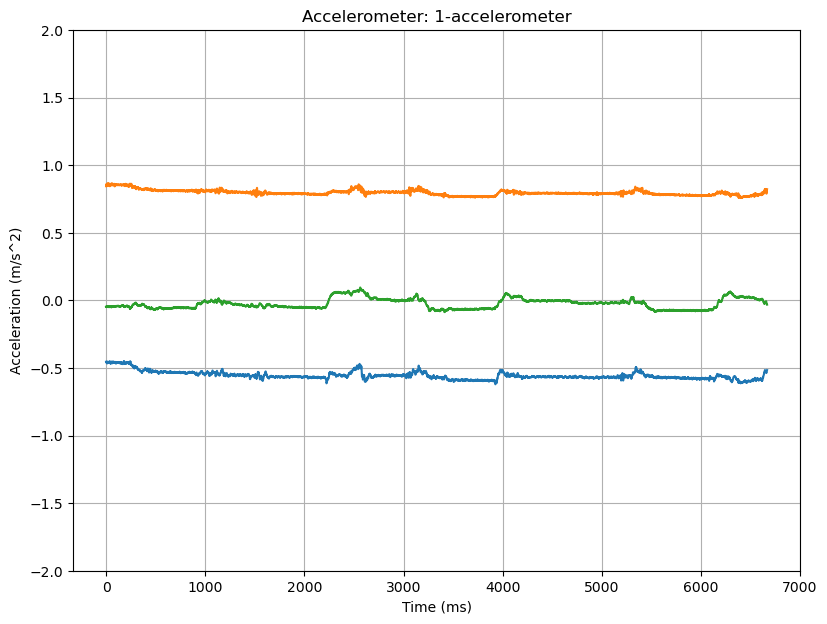

In [30]:
fig_accelerometer(reading_book_df[reading_book_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

In [31]:
data_acc = pd.read_csv(reading_book_df[reading_book_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])
data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
data_acc.describe()

,timestamp,elapsed,x,y,z
count,6.668000e+03,6668.000000,6668.000000,6668.000000,6668.000000
mean,1.568484e+12,33.335000,-0.556106,0.796705,-0.024624
std,1.925030e+04,19.250301,0.029338,0.019734,0.038031
min,1.568484e+12,0.000000,-0.621000,0.759000,-0.087000
25%,1.568484e+12,16.667500,-0.572000,0.784000,-0.056000
50%,1.568484e+12,33.335000,-0.563000,0.793000,-0.026000
75%,1.568484e+12,50.002500,-0.544000,0.807000,-0.001000
max,1.568484e+12,66.670000,-0.450000,0.866000,0.095000


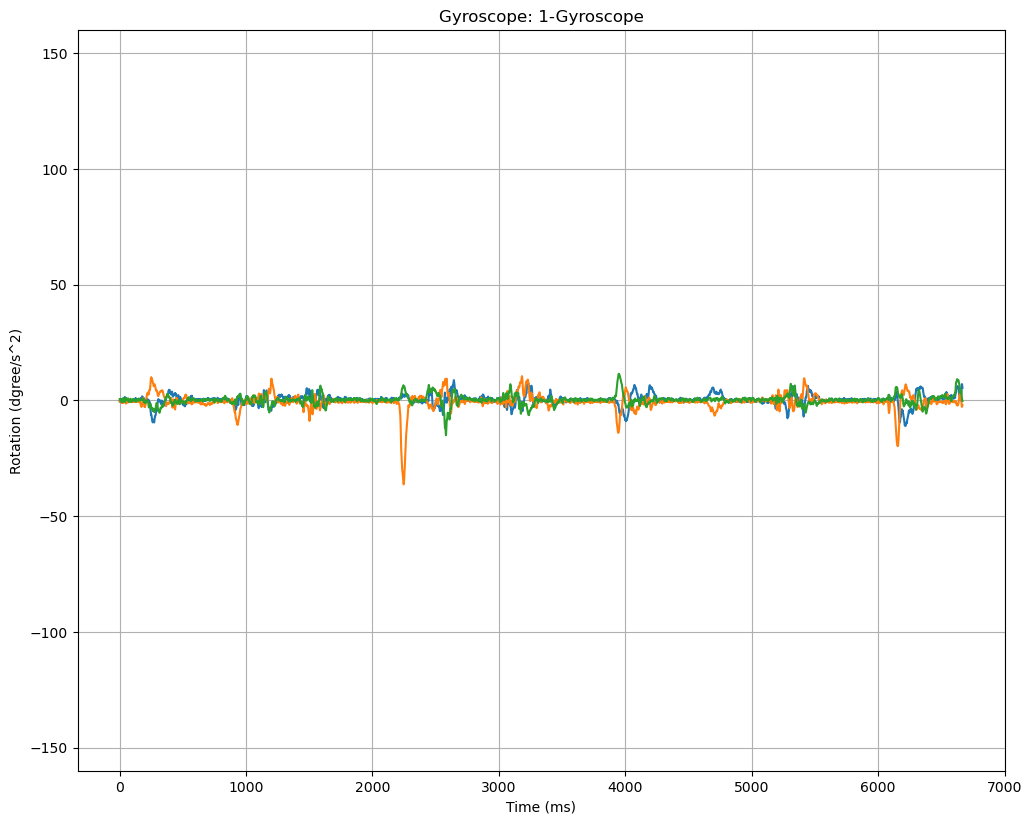

In [32]:
fig_gyroscope(reading_book_df[reading_book_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])


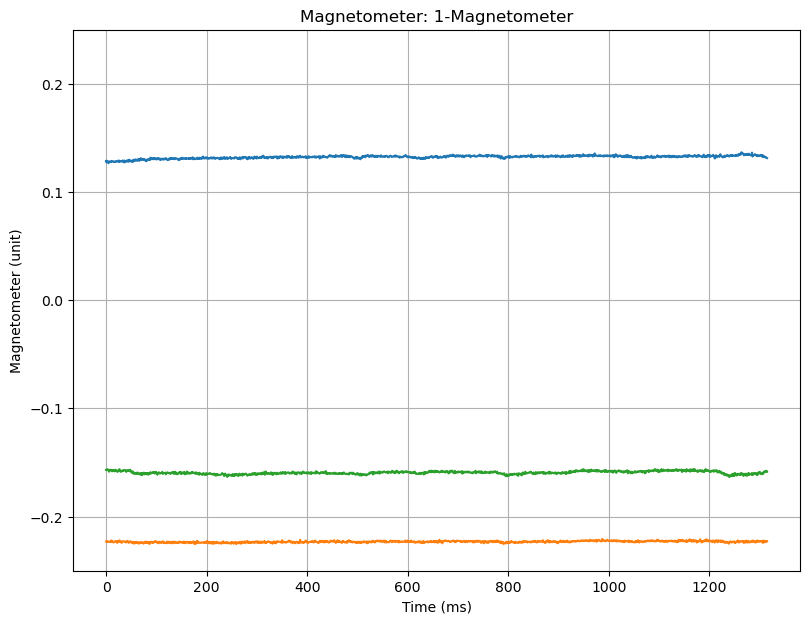

In [33]:
fig_magnetometer(reading_book_df[reading_book_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

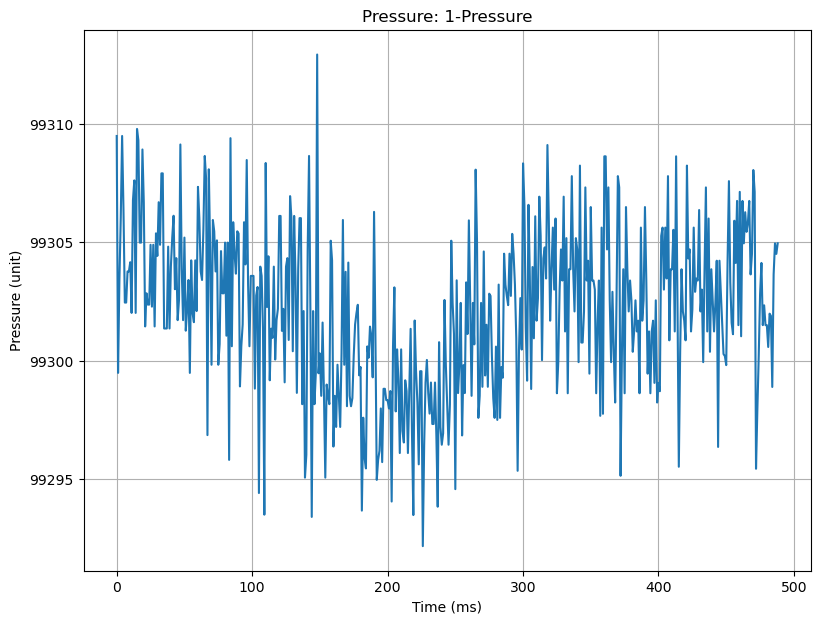

In [34]:
fig_presure(reading_book_df[reading_book_df["sensor"] == "Pressure"].iloc[1,:]["path"])


# Sitting and writing on a notebook

In [35]:
# Using Computer Data
using_computer_df = df[df["exp_No"] == 2]

In [36]:
using_computer_df["sensor"].value_counts()

sensor
Pressure         12
Gyroscope        12
Accelerometer    12
Magnetometer     12
Name: count, dtype: int64

In [37]:
using_computer_df["expID"].value_counts()

expID
2      4
13     4
24     4
35     4
46     4
57     4
68     4
79     4
90     4
101    4
112    4
123    4
Name: count, dtype: int64

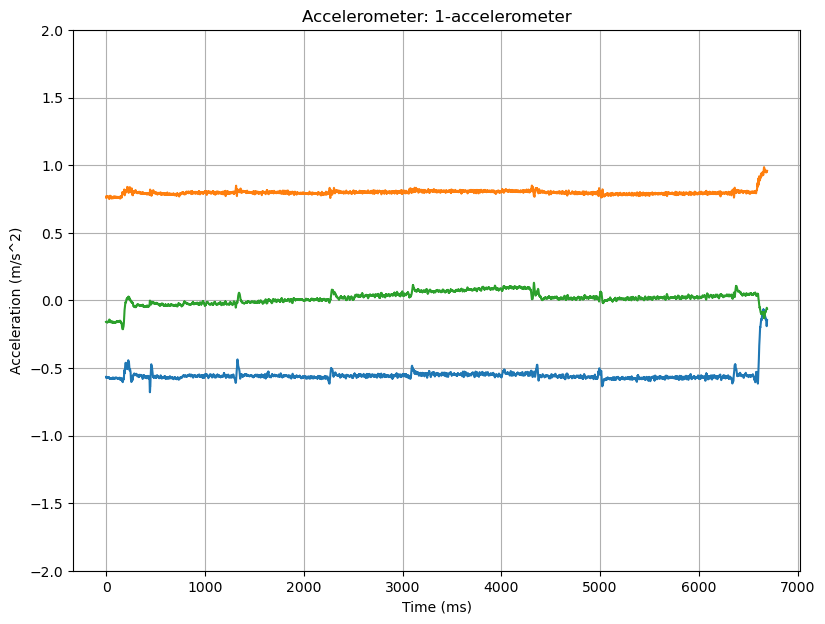

In [38]:
fig_accelerometer(using_computer_df[using_computer_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

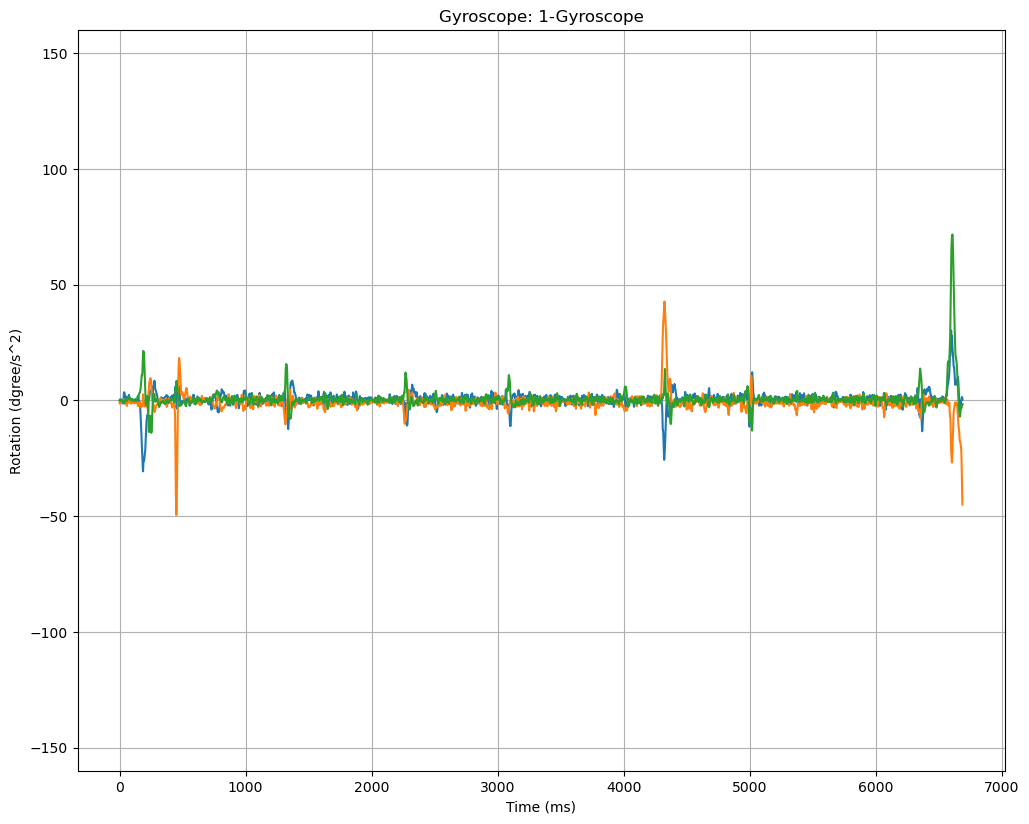

In [39]:
fig_gyroscope(using_computer_df[using_computer_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

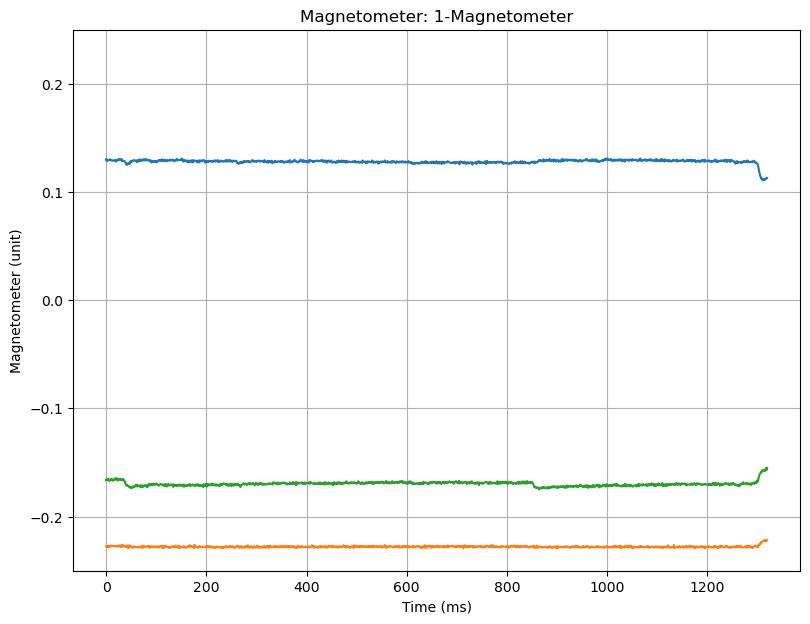

In [40]:
fig_magnetometer(using_computer_df[using_computer_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

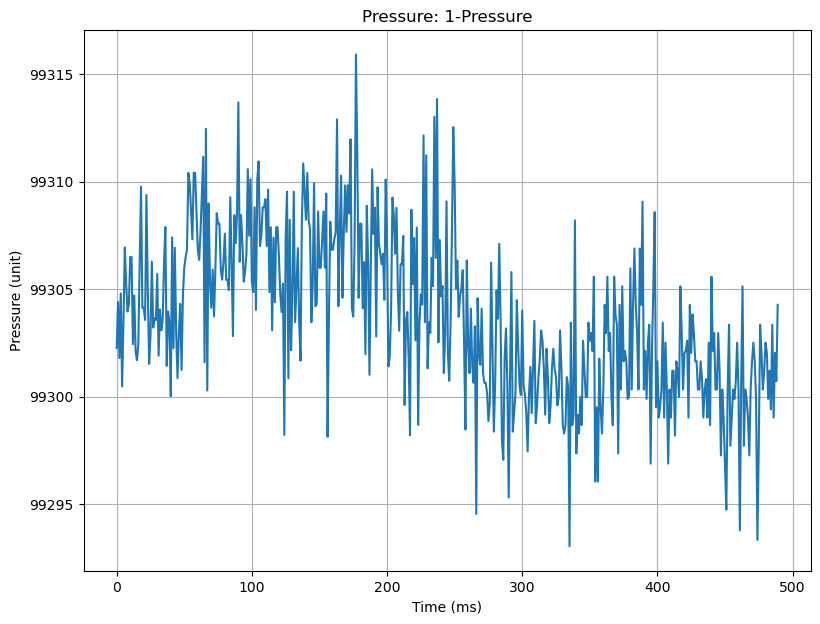

In [41]:
data_pre = pd.read_csv(using_computer_df[using_computer_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

# Typing

In [42]:
# Stand up
stand_up_df = df[df["exp_No"] == 3]

In [43]:
stand_up_df["sensor"].value_counts()

sensor
Gyroscope        13
Accelerometer    13
Pressure         13
Magnetometer     13
Name: count, dtype: int64

In [44]:
stand_up_df["expID"].value_counts()

expID
113    8
3      4
14     4
25     4
36     4
47     4
58     4
69     4
80     4
91     4
102    4
124    4
Name: count, dtype: int64

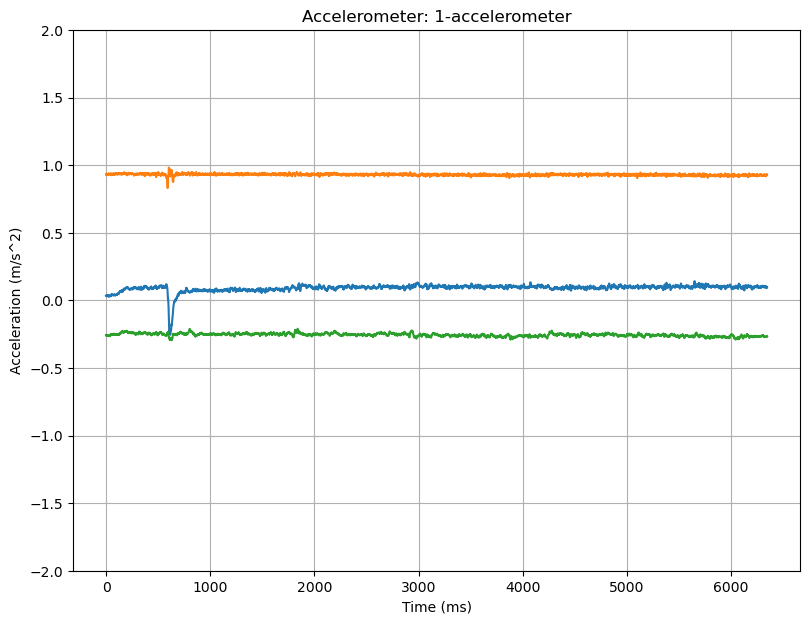

In [45]:
fig_accelerometer(stand_up_df[stand_up_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

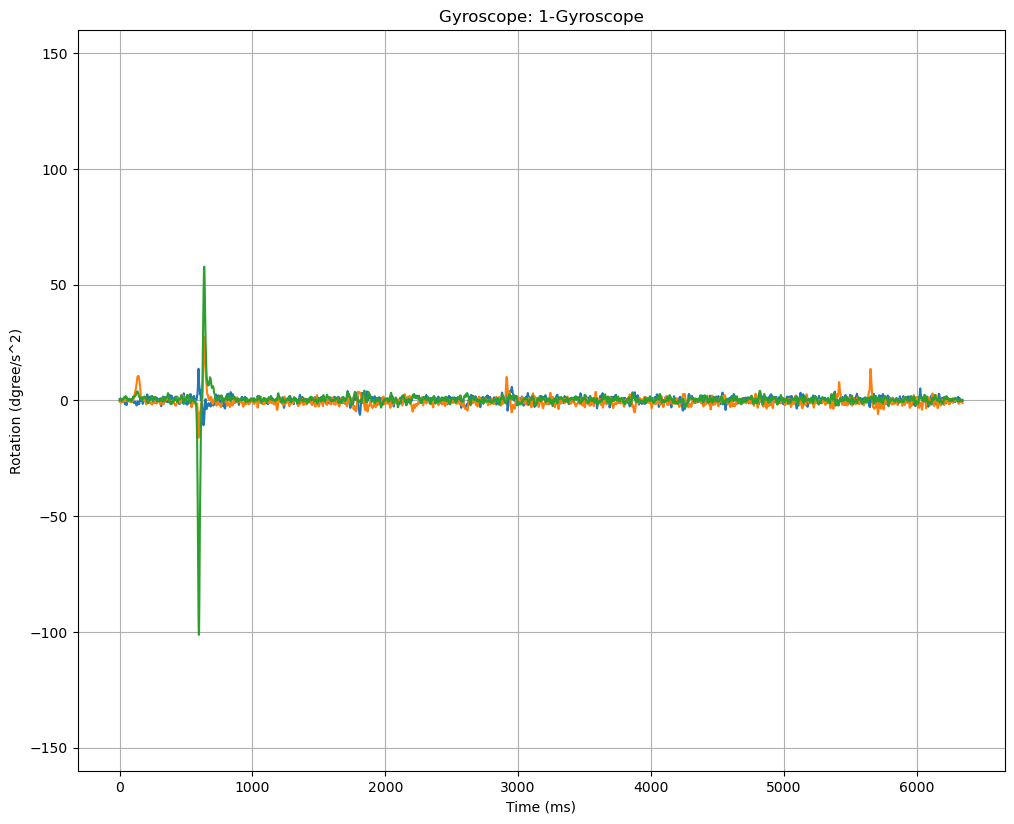

In [46]:
fig_gyroscope(stand_up_df[stand_up_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

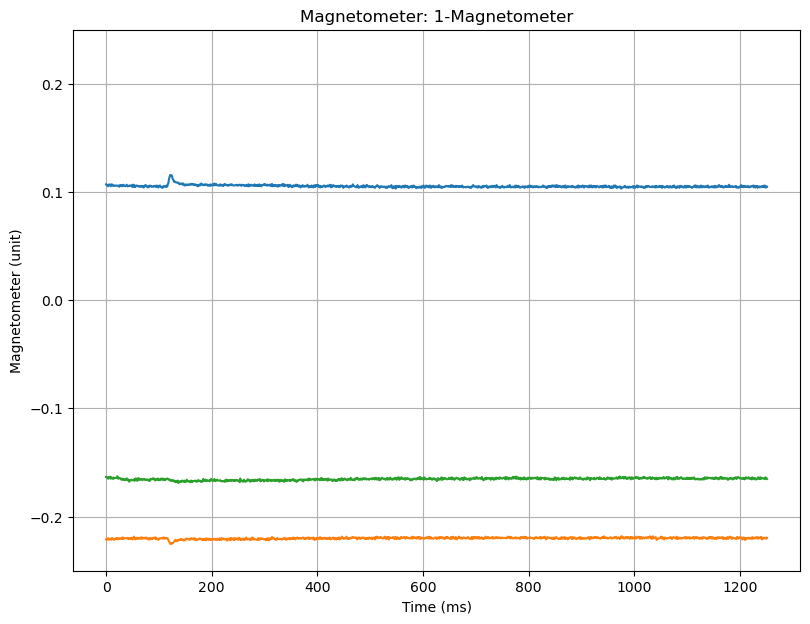

In [47]:
fig_magnetometer(stand_up_df[stand_up_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

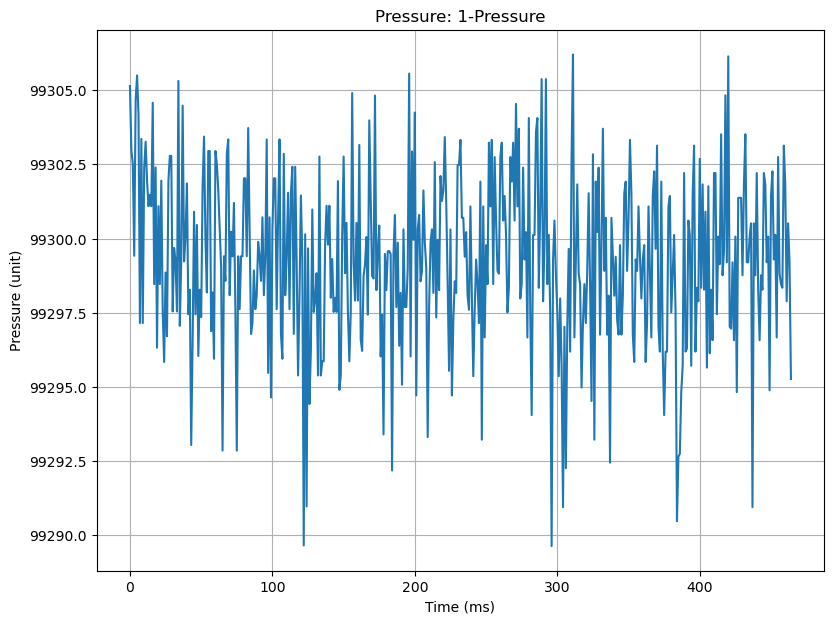

In [48]:
data_pre = pd.read_csv(stand_up_df[stand_up_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [49]:
data_pre

,pressure
0,99305.141
1,99302.969
2,99302.523
3,99299.422
4,99304.664
5,99305.500
6,99304.188
7,99297.156
8,99303.359
9,99297.156


In [50]:
data_pre.describe()

,pressure
count,465.000000
mean,99299.280568
std,2.878106
min,99289.641000
25%,99297.531000
50%,99299.297000
75%,99301.375000
max,99306.203000


# Browsing


In [51]:
# browsing
browsing = df[df["exp_No"] == 4]

In [52]:
browsing["sensor"].value_counts()

sensor
Gyroscope        12
Accelerometer    12
Magnetometer     12
Pressure         12
Name: count, dtype: int64

In [53]:
browsing["expID"].value_counts()

expID
4      4
15     4
26     4
37     4
48     4
59     4
70     4
81     4
92     4
103    4
114    4
125    4
Name: count, dtype: int64

In [54]:
browsing["sensor"].value_counts()

sensor
Gyroscope        12
Accelerometer    12
Magnetometer     12
Pressure         12
Name: count, dtype: int64

In [55]:
browsing["expID"].value_counts()

expID
4      4
15     4
26     4
37     4
48     4
59     4
70     4
81     4
92     4
103    4
114    4
125    4
Name: count, dtype: int64

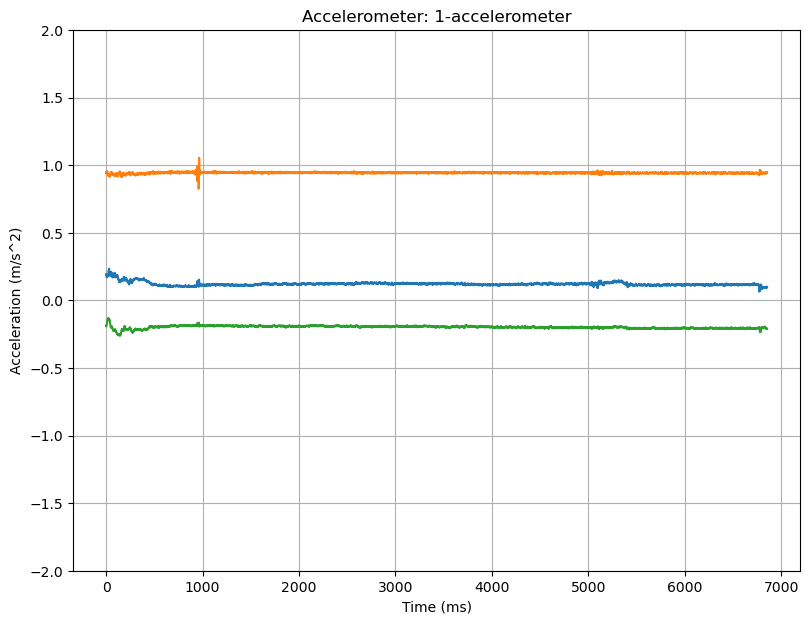

In [56]:
fig_accelerometer(browsing[browsing["sensor"] == "Accelerometer"].iloc[1,:]["path"])

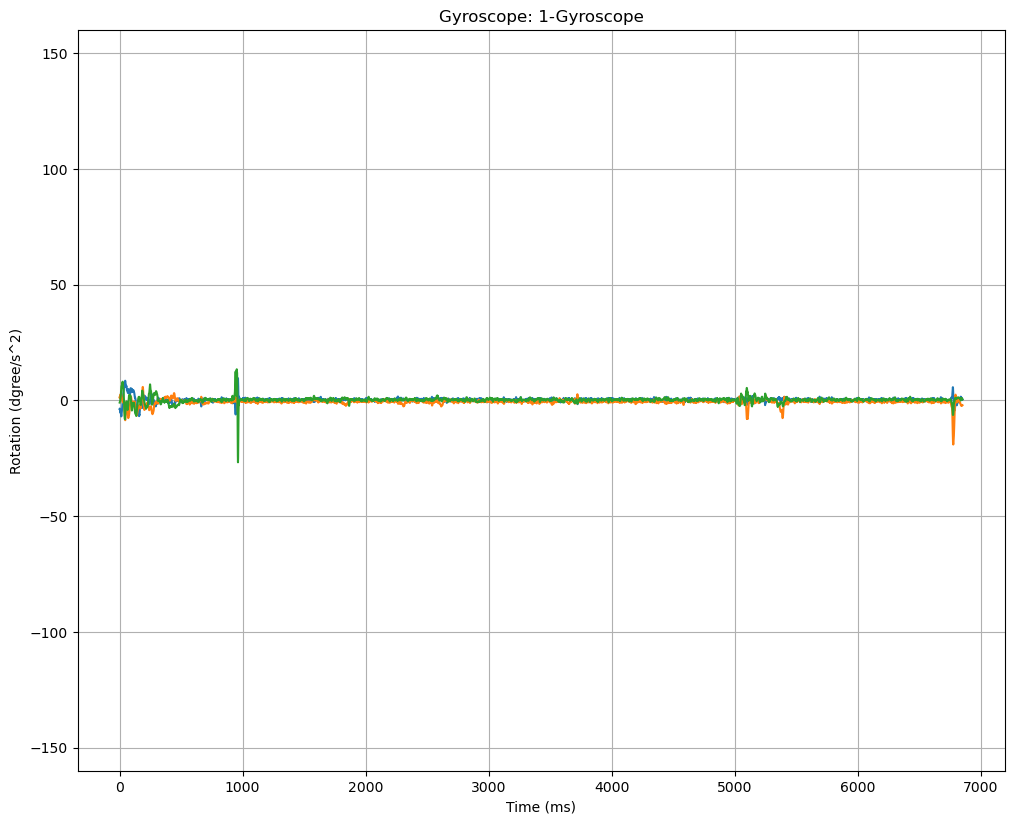

In [57]:
fig_gyroscope(browsing[browsing["sensor"] == "Gyroscope"].iloc[1,:]["path"])

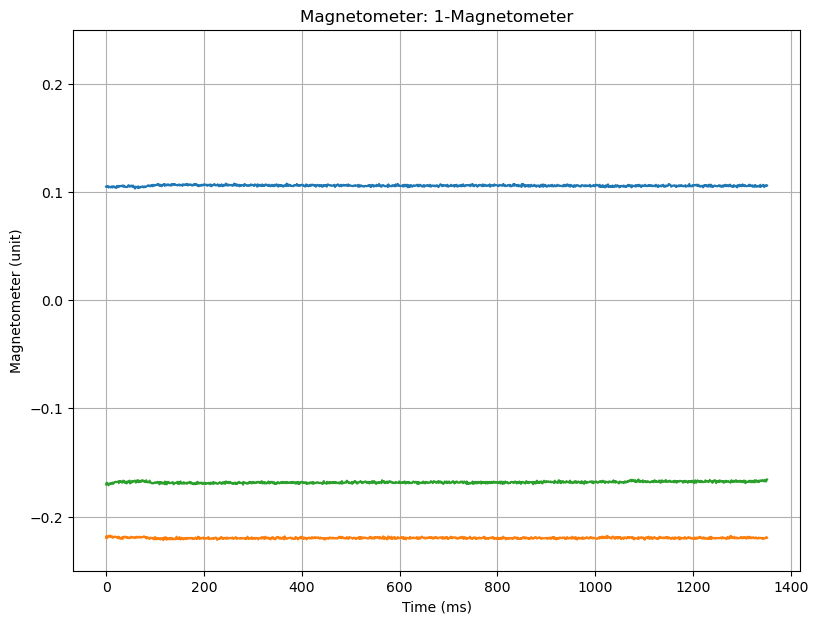

In [58]:
fig_magnetometer(browsing[browsing["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

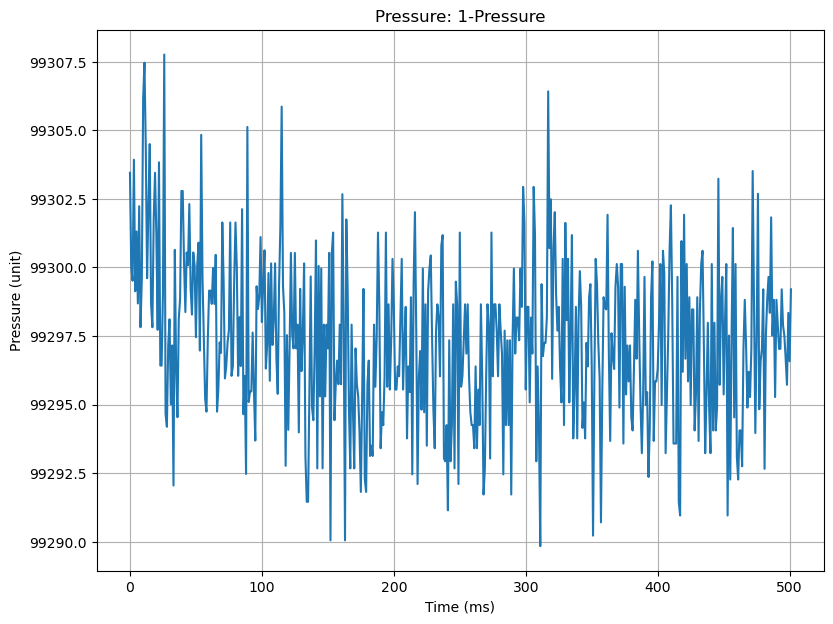

In [59]:
data_pre = pd.read_csv(browsing[browsing["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [60]:
data_pre.describe()

,pressure
count,502.000000
mean,99297.350460
std,3.022015
min,99289.836000
25%,99295.297000
50%,99297.344000
75%,99299.309000
max,99307.766000


# Computing features

In [61]:
df[df["expID"] == 66]

,path,file,expID,sensor,frequency,exp_No,exp_Name
257,../Datasets/Dataset_1A/User6/66_MetaWear_2019-...,66_MetaWear_2019-09-14T16.57.23.673_F1E55E2FE9...,66,Accelerometer,100.000Hz,11,Taking stairs
264,../Datasets/Dataset_1A/User6/66_MetaWear_2019-...,66_MetaWear_2019-09-14T16.57.23.673_F1E55E2FE9...,66,Gyroscope,100.000Hz,11,Taking stairs
284,../Datasets/Dataset_1A/User6/66_MetaWear_2019-...,66_MetaWear_2019-09-14T16.57.23.673_F1E55E2FE9...,66,Pressure,7.330Hz,11,Taking stairs
272,../Datasets/Dataset_1A/User6/66_MetaWear_2019-...,66_MetaWear_2019-09-14T16.57.23.673_F1E55E2FE9...,66,Magnetometer,20.000Hz,11,Taking stairs


In [62]:
df.drop([84],inplace=True)

In [63]:
df["expID"].value_counts().index

Index([113,   1,  98,  96,  95,  94,  93,  92,  91,  90,
       ...
        43,  42,  41,  40,  39,  38,  37,  36, 132,  54],
      dtype='int32', name='expID', length=129)

# Feature Extraction

In [64]:
result_list = []
for exp_id in df["expID"].value_counts().index:

    temp_df = df[df["expID"] == exp_id]

    # Check if both required sensors are present
    if not {"Accelerometer", "Gyroscope"}.issubset(set(temp_df["sensor"])):
        continue

    # Skip TUG test as it has a different pattern and we have only 1 sample for it
    if exp_id % 6 == 0:
        continue


    acc_data = pd.read_csv(temp_df[temp_df["sensor"] == "Accelerometer"].iloc[0,0])
    #acc_data = acc_data[['x-axis (g)','y-axis (g)','z-axis (g)']] * 9.8 * 4
    acc_data.rename(columns={'x-axis (g)':'x','y-axis (g)':'y','z-axis (g)':'z'},inplace=True)
    acc_data = acc_data[['x','y','z']]

    gyr_data = pd.read_csv(temp_df[temp_df["sensor"] == "Gyroscope"].iloc[0,0])
    gyr_data.rename(columns={'x-axis (deg/s)':'x','y-axis (deg/s)':'y','z-axis (deg/s)':'z'},inplace=True)
    gyr_data = gyr_data[['x','y','z']]

    window_size = 100 # sampling rate
    step_size = window_size // 2  # 50% overlap
    j = 0
    for i in range(0, len(acc_data), step_size):
        window_acc_data = acc_data[i:i+window_size]
        if len(window_acc_data) < window_size:
            break
        #compute the features for the current window
        acc_x_mean = window_acc_data["x"].mean()
        acc_x_var = window_acc_data["y"].var()
        acc_y_mean = window_acc_data["z"].mean()
        acc_y_var = window_acc_data["y"].var()
        acc_z_mean = window_acc_data["z"].mean()
        acc_z_var = window_acc_data["z"].var()
        acc_sumxyz = window_acc_data.sum()
        acc_sum_mean = acc_sumxyz.mean()
        acc_sum_var = acc_sumxyz.var()
        acc_abssum = window_acc_data.abs().sum()
        acc_abssum_mean = acc_abssum.mean()
        acc_abssum_var = acc_abssum.var()
        acc_maxabssum = acc_abssum.max()


        window_data_gyr = gyr_data[i:i+window_size]
        #compute the features for the current window
        gyr_x_mean = window_data_gyr["x"].mean()
        gyr_x_var = window_data_gyr["x"].var()
        gyr_y_mean = window_data_gyr["y"].mean()
        gyr_y_var = window_data_gyr["y"].var()
        gyr_z_mean = window_data_gyr["z"].mean()
        gyr_z_var = window_data_gyr["z"].var()
        gyr_sumxyz = window_data_gyr.sum()
        gyr_sum_mean = gyr_sumxyz.mean()
        gyr_sum_var = gyr_sumxyz.var()
        gyr_abssum = window_data_gyr.abs().sum()
        gyr_abssum_mean = gyr_abssum.mean()
        gyr_abssum_var = gyr_abssum.var()
        gyr_maxabssum = gyr_abssum.max()
        result_list.append([acc_x_mean, acc_x_var, acc_y_mean,
                              acc_y_var, acc_z_mean, acc_z_var,
                              acc_sum_mean, acc_abssum_mean, acc_sum_var,
                              acc_abssum_var, acc_maxabssum, gyr_x_mean,
                              gyr_x_var, gyr_y_mean, gyr_y_var,
                              gyr_z_mean, gyr_z_var, gyr_sum_mean,
                              gyr_abssum_mean, gyr_sum_var, gyr_abssum_var,
                              gyr_maxabssum, temp_df[temp_df["sensor"] == "Accelerometer"].iloc[0,5]])


In [65]:
result_df = pd.DataFrame(result_list)

In [66]:
result_df.to_csv("Selected_Feature_50percent_overlap.csv")

In [67]:
result_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.70659,0.000094,0.06855,0.000094,0.06855,0.000031,1.688333,49.987667,5139.995749,1396.121225,...,-0.31280,7.768589,-1.63593,2.782740,-49.833333,208.660000,11174.866922,789.286413,239.576,3
1,0.72292,0.000175,0.07150,0.000175,0.07150,0.000033,2.884000,50.077333,5131.763748,1382.630961,...,0.52380,3.905949,-2.92306,2.201588,-106.904333,199.961000,30213.695974,6461.463259,292.306,3
2,0.74373,0.000128,0.06305,0.000128,0.06305,0.000150,3.894000,49.891333,5143.027231,1432.054372,...,-0.54080,2.525574,-2.37068,8.673986,-156.744667,218.212000,8745.503417,8670.419316,318.406,3
3,0.75232,0.000056,0.05097,0.000056,0.05097,0.000064,4.018667,49.534000,5149.293358,1493.092147,...,-2.65307,8.255995,-0.54945,10.146841,-99.761333,295.323333,21994.721706,1301.502194,331.826,3
4,0.74905,0.000055,0.05150,0.000055,0.05150,0.000042,3.953667,49.416333,5120.404360,1480.890580,...,-2.38298,9.303921,0.22136,2.624638,14.060667,223.943333,61712.227297,5699.335089,276.110,3
